<a href="https://colab.research.google.com/github/dushanranasinghe/Google-Colab/blob/main/prediction_with_json_obj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 214 kB 11.8 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640318 sha256=35bbeedf10d23d898ead0a36b877f0b90066cf42951e0a943d0ca7d1f4e5adbd
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [6]:
import pandas as pd
import json
from prophet import Prophet

json_obj = json.dumps([
  {
    "ds": "10/13/2021",
    "Close/Last": 58168.4,
    "Volume": "N/A",
    "Open": 56279.9,
    "High": 58506.5,
    "Low": 57149.8,
    "y": 57828.15
  },
  {
    "ds": "10/12/2021",
    "Close/Last": 56297.4,
    "Volume": "N/A",
    "Open": 56673.3,
    "High": 56537.3,
    "Low": 55845.3,
    "y": 56191.3
  },
  {
    "ds": "10/11/2021",
    "Close/Last": 56704.4,
    "Volume": "N/A",
    "Open": 56505.4,
    "High": 57480.6,
    "Low": 56438.3,
    "y": 56959.45
  },
  {
    "ds": "10/10/2021",
    "Close/Last": 56534.9,
    "Volume": "N/A",
    "Open": 55076.9,
    "High": 56681.6,
    "Low": 54457.8,
    "y": 55569.7
  },
  {
    "ds": "10/9/2021",
    "Close/Last": 54868.6,
    "Volume": "N/A",
    "Open": 54583.6,
    "High": 55169.9,
    "Low": 54100.8,
    "y": 54635.35
  },
  {
    "ds": "10/8/2021",
    "Close/Last": 54637.5,
    "Volume": "N/A",
    "Open": 53802.5,
    "High": 54681.9,
    "Low": 53711.7,
    "y": 54196.8
  }
])

# Python
df = pd.read_json(json_obj)
df.head()

,ds,Close/Last,Volume,Open,High,Low,y
0,10/13/2021,58168.4,N/A,56279.9,58506.5,57149.8,57828.15
1,10/12/2021,56297.4,N/A,56673.3,56537.3,55845.3,56191.30
2,10/11/2021,56704.4,N/A,56505.4,57480.6,56438.3,56959.45
3,10/10/2021,56534.9,N/A,55076.9,56681.6,54457.8,55569.70
4,10/9/2021,54868.6,N/A,54583.6,55169.9,54100.8,54635.35


In [10]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


,ds
11,2021-10-19
12,2021-10-20
13,2021-10-21
14,2021-10-22
15,2021-10-23


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
11,2021-10-19,61756.814546,61202.957342,62307.011511
12,2021-10-20,62445.670386,61868.830889,63009.812020
13,2021-10-21,63134.526225,62537.931887,63738.231517
14,2021-10-22,63823.382064,63313.483954,64409.773755
15,2021-10-23,64512.237904,63965.312735,65091.925447


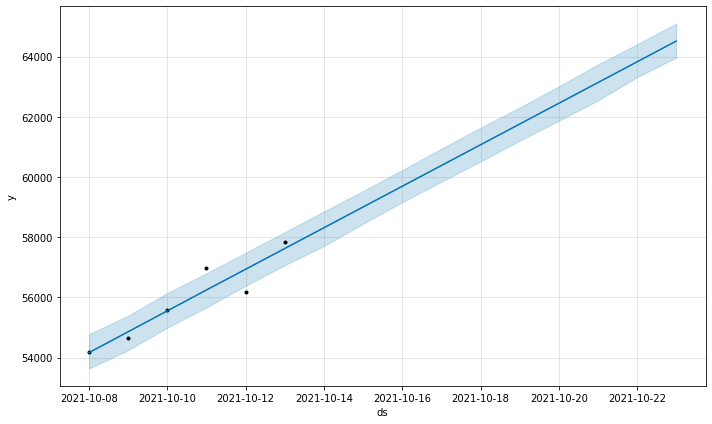

In [12]:
fig1 = m.plot(forecast)
